In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import seaborn as sns

In [90]:
def relocation ():
    data = pd.read_csv("서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding = "euc-kr")
    data['year'] = data['사용월'].apply(lambda x: str(x)[:4])
    
    data_sr = data.sort_values(by = ['호선명','지하철역'], ascending = [True, True])
    
    x_data = ['2015', '2016', '2017']
    data_qr = data_sr.query('year != @x_data')
    
    df_i = data_qr.iloc[0:, 0:47]
    
    df = df_i.drop('사용월', axis = 1)
    
    return df

In [91]:
def all_data_col_sum(re_df):
    
    col_sum_df = re_df.groupby('호선명').sum()
    
    col_sum_df['total'] = col_sum_df.sum(axis=1)
    pd.reset_option('display.float_format')
    
    return col_sum_df

In [92]:
def largest(s_df):
    top_3_data = s_df.nlargest(3, 'total')
    
    return top_3_data

In [93]:
def top_3(lg_df, re_df):
    
    top_3_df_idx = lg_df.index.tolist()
    
    top_3_df = re_df.query('호선명 == @top_3_df_idx')
    
    col_sum_top_3_df = top_3_df.groupby(['호선명','지하철역']).sum()
    col_sum_top_3_df['total'] = col_sum_top_3_df.sum(axis = 1)
    
    return col_sum_top_3_df

In [94]:
def merge_columns(t_df):
    dr_t_df = t_df.drop('total', axis = 1)
    
    col_list = []
    col_result = []
    for i in dr_t_df.columns:
        col_list.append(i[:7])

    for i in col_list:
        if i not in col_result:
            col_result.append(i)

    for i in range(len(col_result)):
        dr_t_df[col_result[i]] = dr_t_df[dr_t_df.columns[2*i]] + dr_t_df[dr_t_df.columns[2*i+1]]
    
    result_df = dr_t_df.iloc[0:, -len(col_result):]
    result_df['total'] = result_df.sum(axis = 1)
    
    return result_df

In [95]:
def top3_idx(top_3_data):
    f_data = top_3_data.nlargest(1,'total')
    f_df_idx = f_data.index.tolist()
    
    t_data = top_3_data.nsmallest(1,'total')
    t_df_idx = t_data.index.tolist()
    
    s_data = top_3_data.query('호선명 != @t_df_idx and 호선명 != @f_df_idx')
    s_df_idx = s_data.index.tolist()
    
    return f_df_idx, s_df_idx, t_df_idx

In [96]:
def top_3_f_s_t(t_df_m, f_df_idx, s_df_idx, t_df_idx):
    first_df = top_3_df_merge_col.loc[f_df_idx, :].nlargest(3,'total')

    second_df = top_3_df_merge_col.loc[s_df_idx, :].nlargest(3,'total')

    third_df = top_3_df_merge_col.loc[t_df_idx, :].nlargest(3,'total')
    
    return first_df, second_df, third_df

In [97]:
def make_bar_gr(df_name):

    plt.rcParams['font.family'] = 'AppleGothic'
    
    df = df_name['total']

    df.plot(kind='bar', figsize=(50,30), fontsize=40)

    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values], fontsize = 40)

    plt.title("2018.01 - 2022.10 지하철 호선 별 승하차 인원", fontsize = 90,)

    plt.xlabel("호선명", fontsize = 50)

    plt.ylabel("인원수", fontsize = 50)

    plt.show()

In [108]:
def make_line_gr(df_name, df_title):

    plt.rcParams['font.family'] = 'AppleGothic'

    df = df_name.iloc[:, :-1].T

    title_dict = {"first_df" : '2호선 승하차 인원 - top3(강남 / 잠실 / 홍대입구)',
             "second_df" : '7호선 승하차 인원 - top3(가산디지털단지 / 광명사거리 / 철산)',
             "third_df" : '5호선 승하차 인원 - top3(광화문(세종문화회관) / 까치산 / 화곡)'}

    df.plot(kind='line', figsize=(130,80), fontsize=50, linewidth = 12, marker = 'o', ms = 50) #lineplot

    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values], fontsize = 70)

    x = np.arange(len(df.index))

    xdata = df.index

    plt.xticks(x, xdata)

    plt.title('2018.01 - 2022.10  ' + title_dict[df_title],
         fontsize = 160)

    plt.xlabel("시간", fontsize = 100)

    plt.ylabel("인원수", fontsize = 100)

    plt.legend(fontsize = 100)

    plt.show()

In [109]:
df = relocation()
sum_df = all_data_col_sum(df)
largest_df = largest(sum_df)
top_3_df = top_3(largest_df,df) 
top_3_df_merge_col = merge_columns(top_3_df)
first_df_idx, second_df_idx, third_df_idx = top3_idx(largest_df) 
first_df, second_df, third_df = top_3_f_s_t(top_3_df_merge_col, first_df_idx, second_df_idx, third_df_idx) #그래프 (line)

In [104]:
third_df

04시-05시  05시-06시  06시-07시  07시-08시   08시-09시  09시-10시  \
호선명 지하철역                                                                 
5호선 광화문(세종문화회관)      642   116160  1611534  5178588  16284322  7016348   
    까치산             7610  1458620  2944992  7953660  10178646  5534919   
    화곡              8108  1370714  2859450  7465823  10080864  5497857   

                 10시-11시  11시-12시  12시-13시  13시-14시  ...  17시-18시   18시-19시  \
호선명 지하철역                                             ...                      
5호선 광화문(세종문화회관)  3632324  3990144  4034219  4856310  ...  8186410  15055040   
    까치산          3747149  3524522  3814976  3863882  ...  5747364   8591865   
    화곡           3635057  3457150  3661928  3720067  ...  5788144   8725480   

                 19시-20시  20시-21시  21시-22시  22시-23시  23시-24시  00시-01시  \
호선명 지하철역                                                                
5호선 광화문(세종문화회관)  6358488  4164328  4309843  2876042  1023567   126791   
    까치산          7225578  4678660  4312171  3707379  2152180   425772   
    화곡           6941231  4357424  3890332  3487041  1927009   389570   

                 01시-02시      total  
호선명 지하철역                             
5호선 광화문(세종문화회관)     1881  104165726  
    까치산            15703   92718340  
    화곡              1478   89534638  

[3 rows x 23 columns]

/var/folders/70/_t6jnr7s3_s60h0zhtk312fh0000gn/T/ipykernel_68481/2703251884.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values], fontsize = 40)


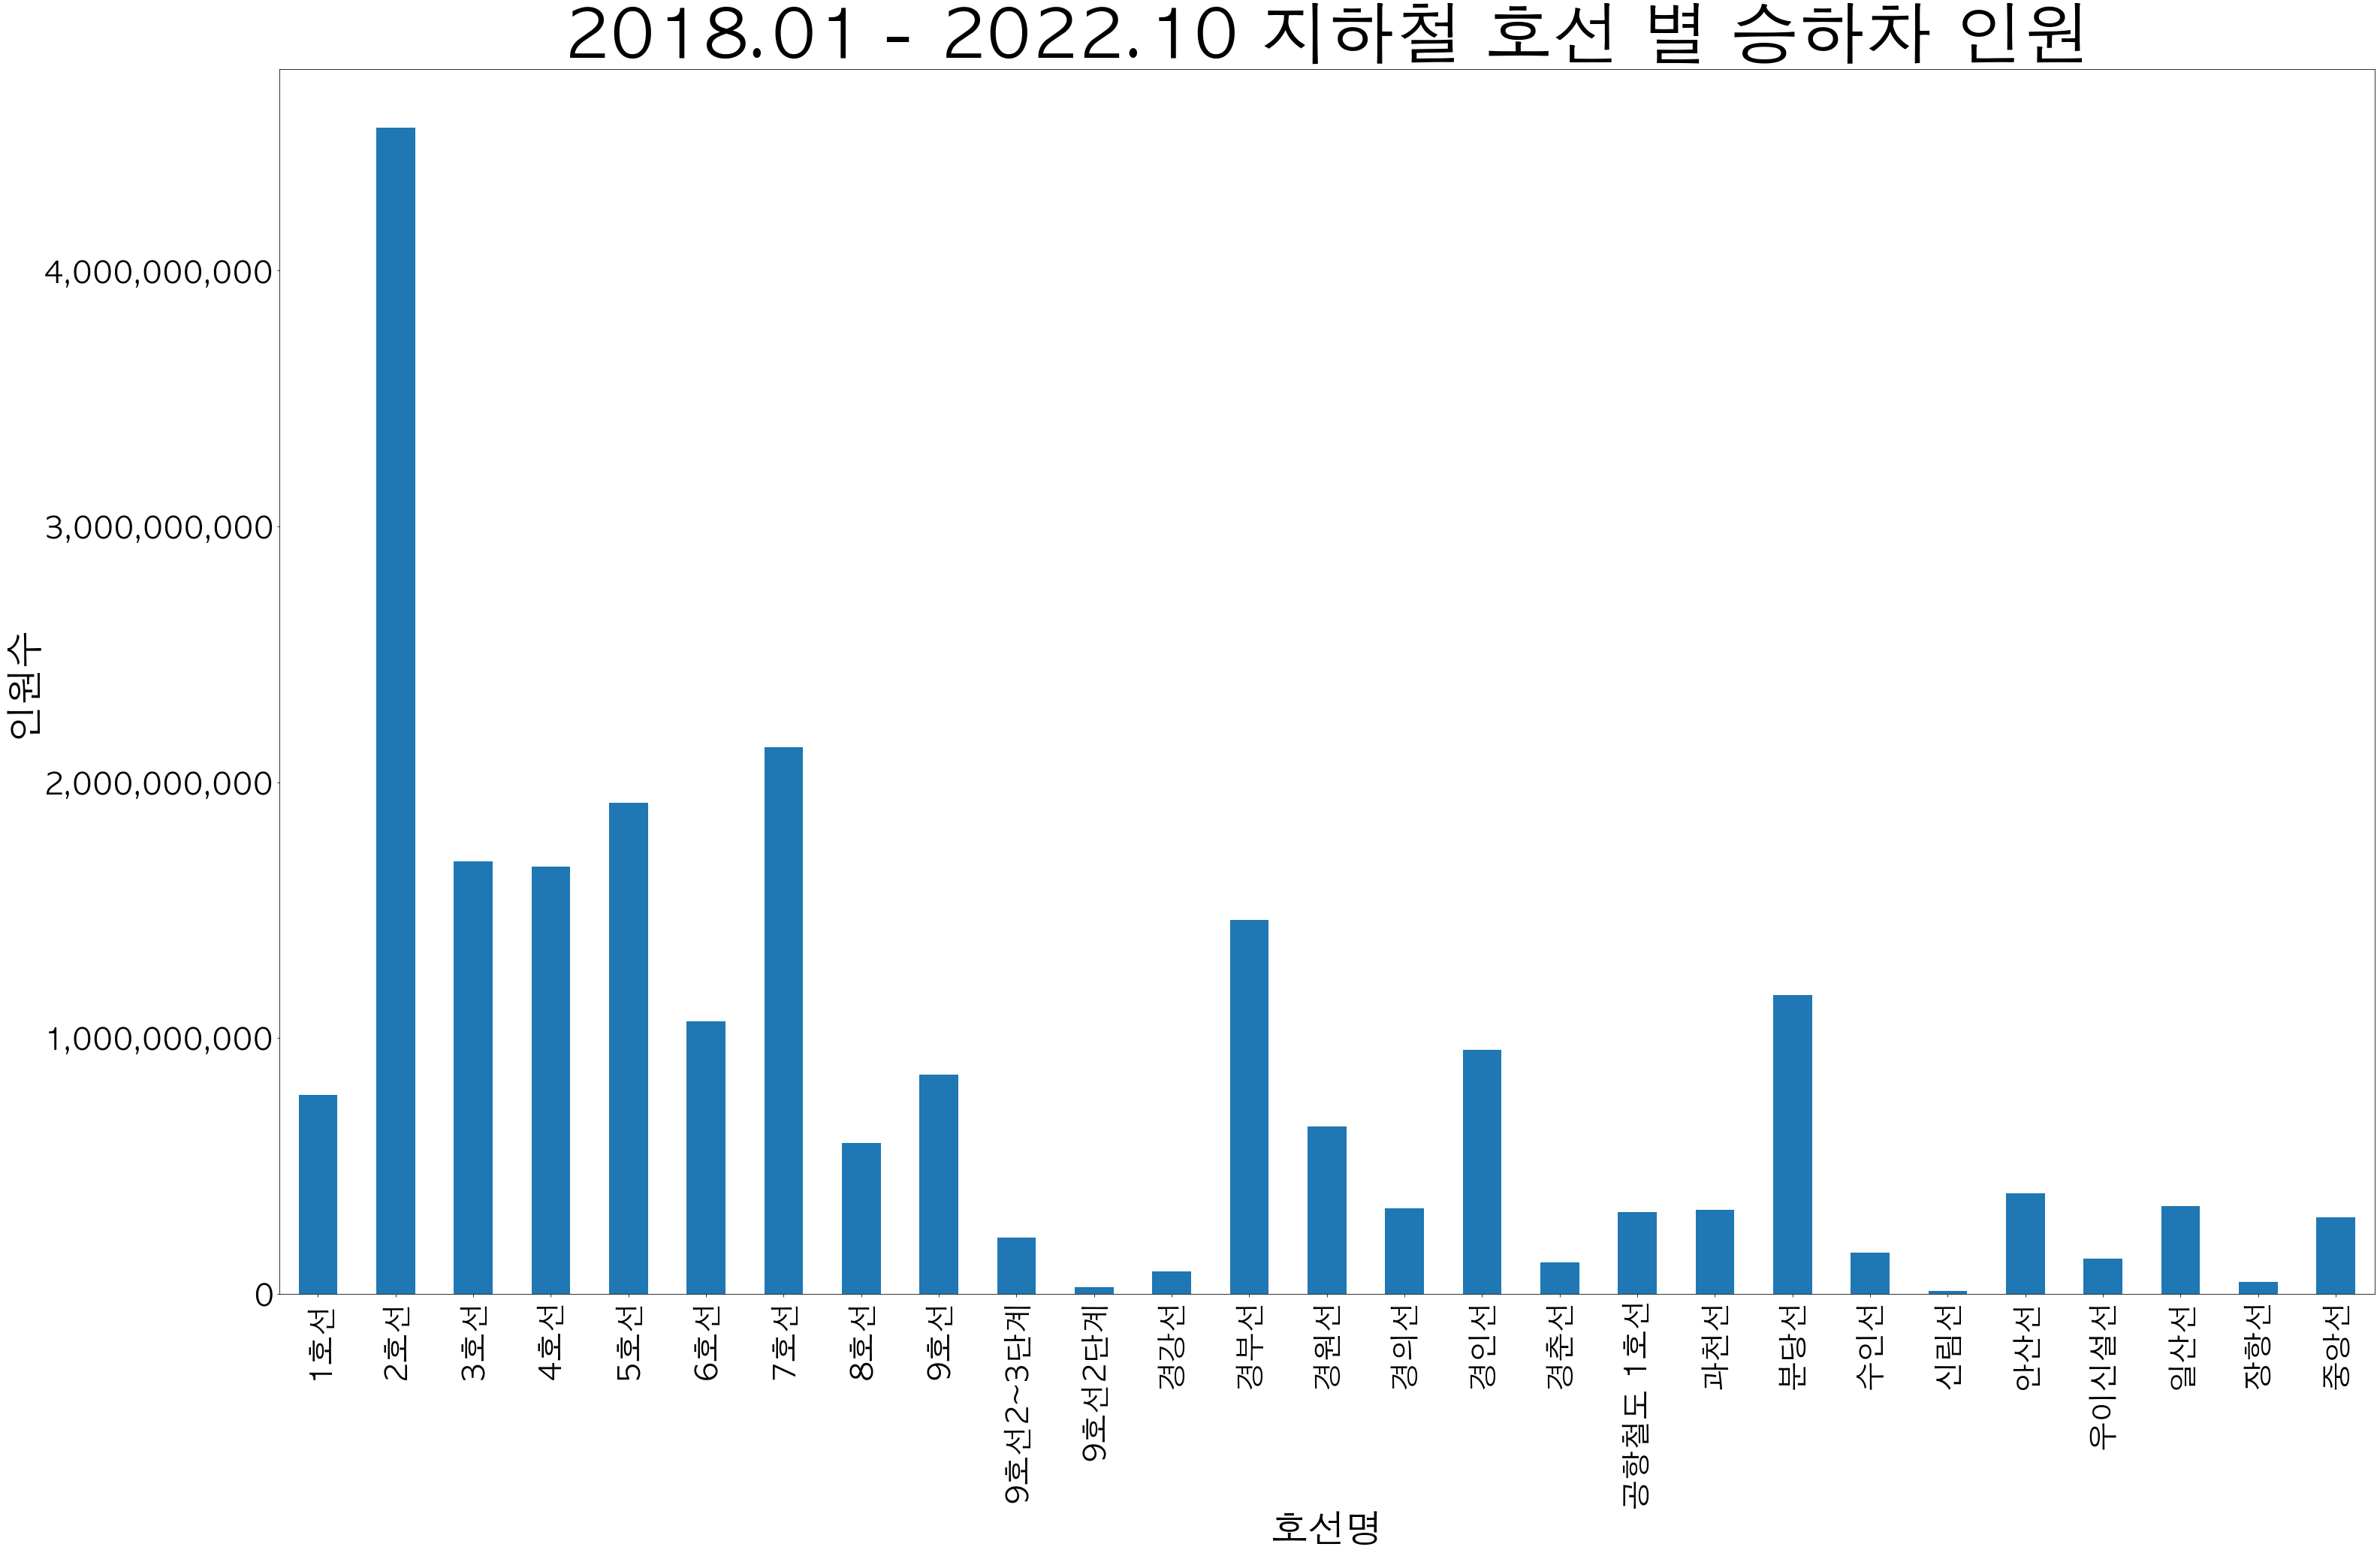

In [101]:
make_bar_gr(sum_df)

/var/folders/70/_t6jnr7s3_s60h0zhtk312fh0000gn/T/ipykernel_68481/244914295.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values], fontsize = 70)


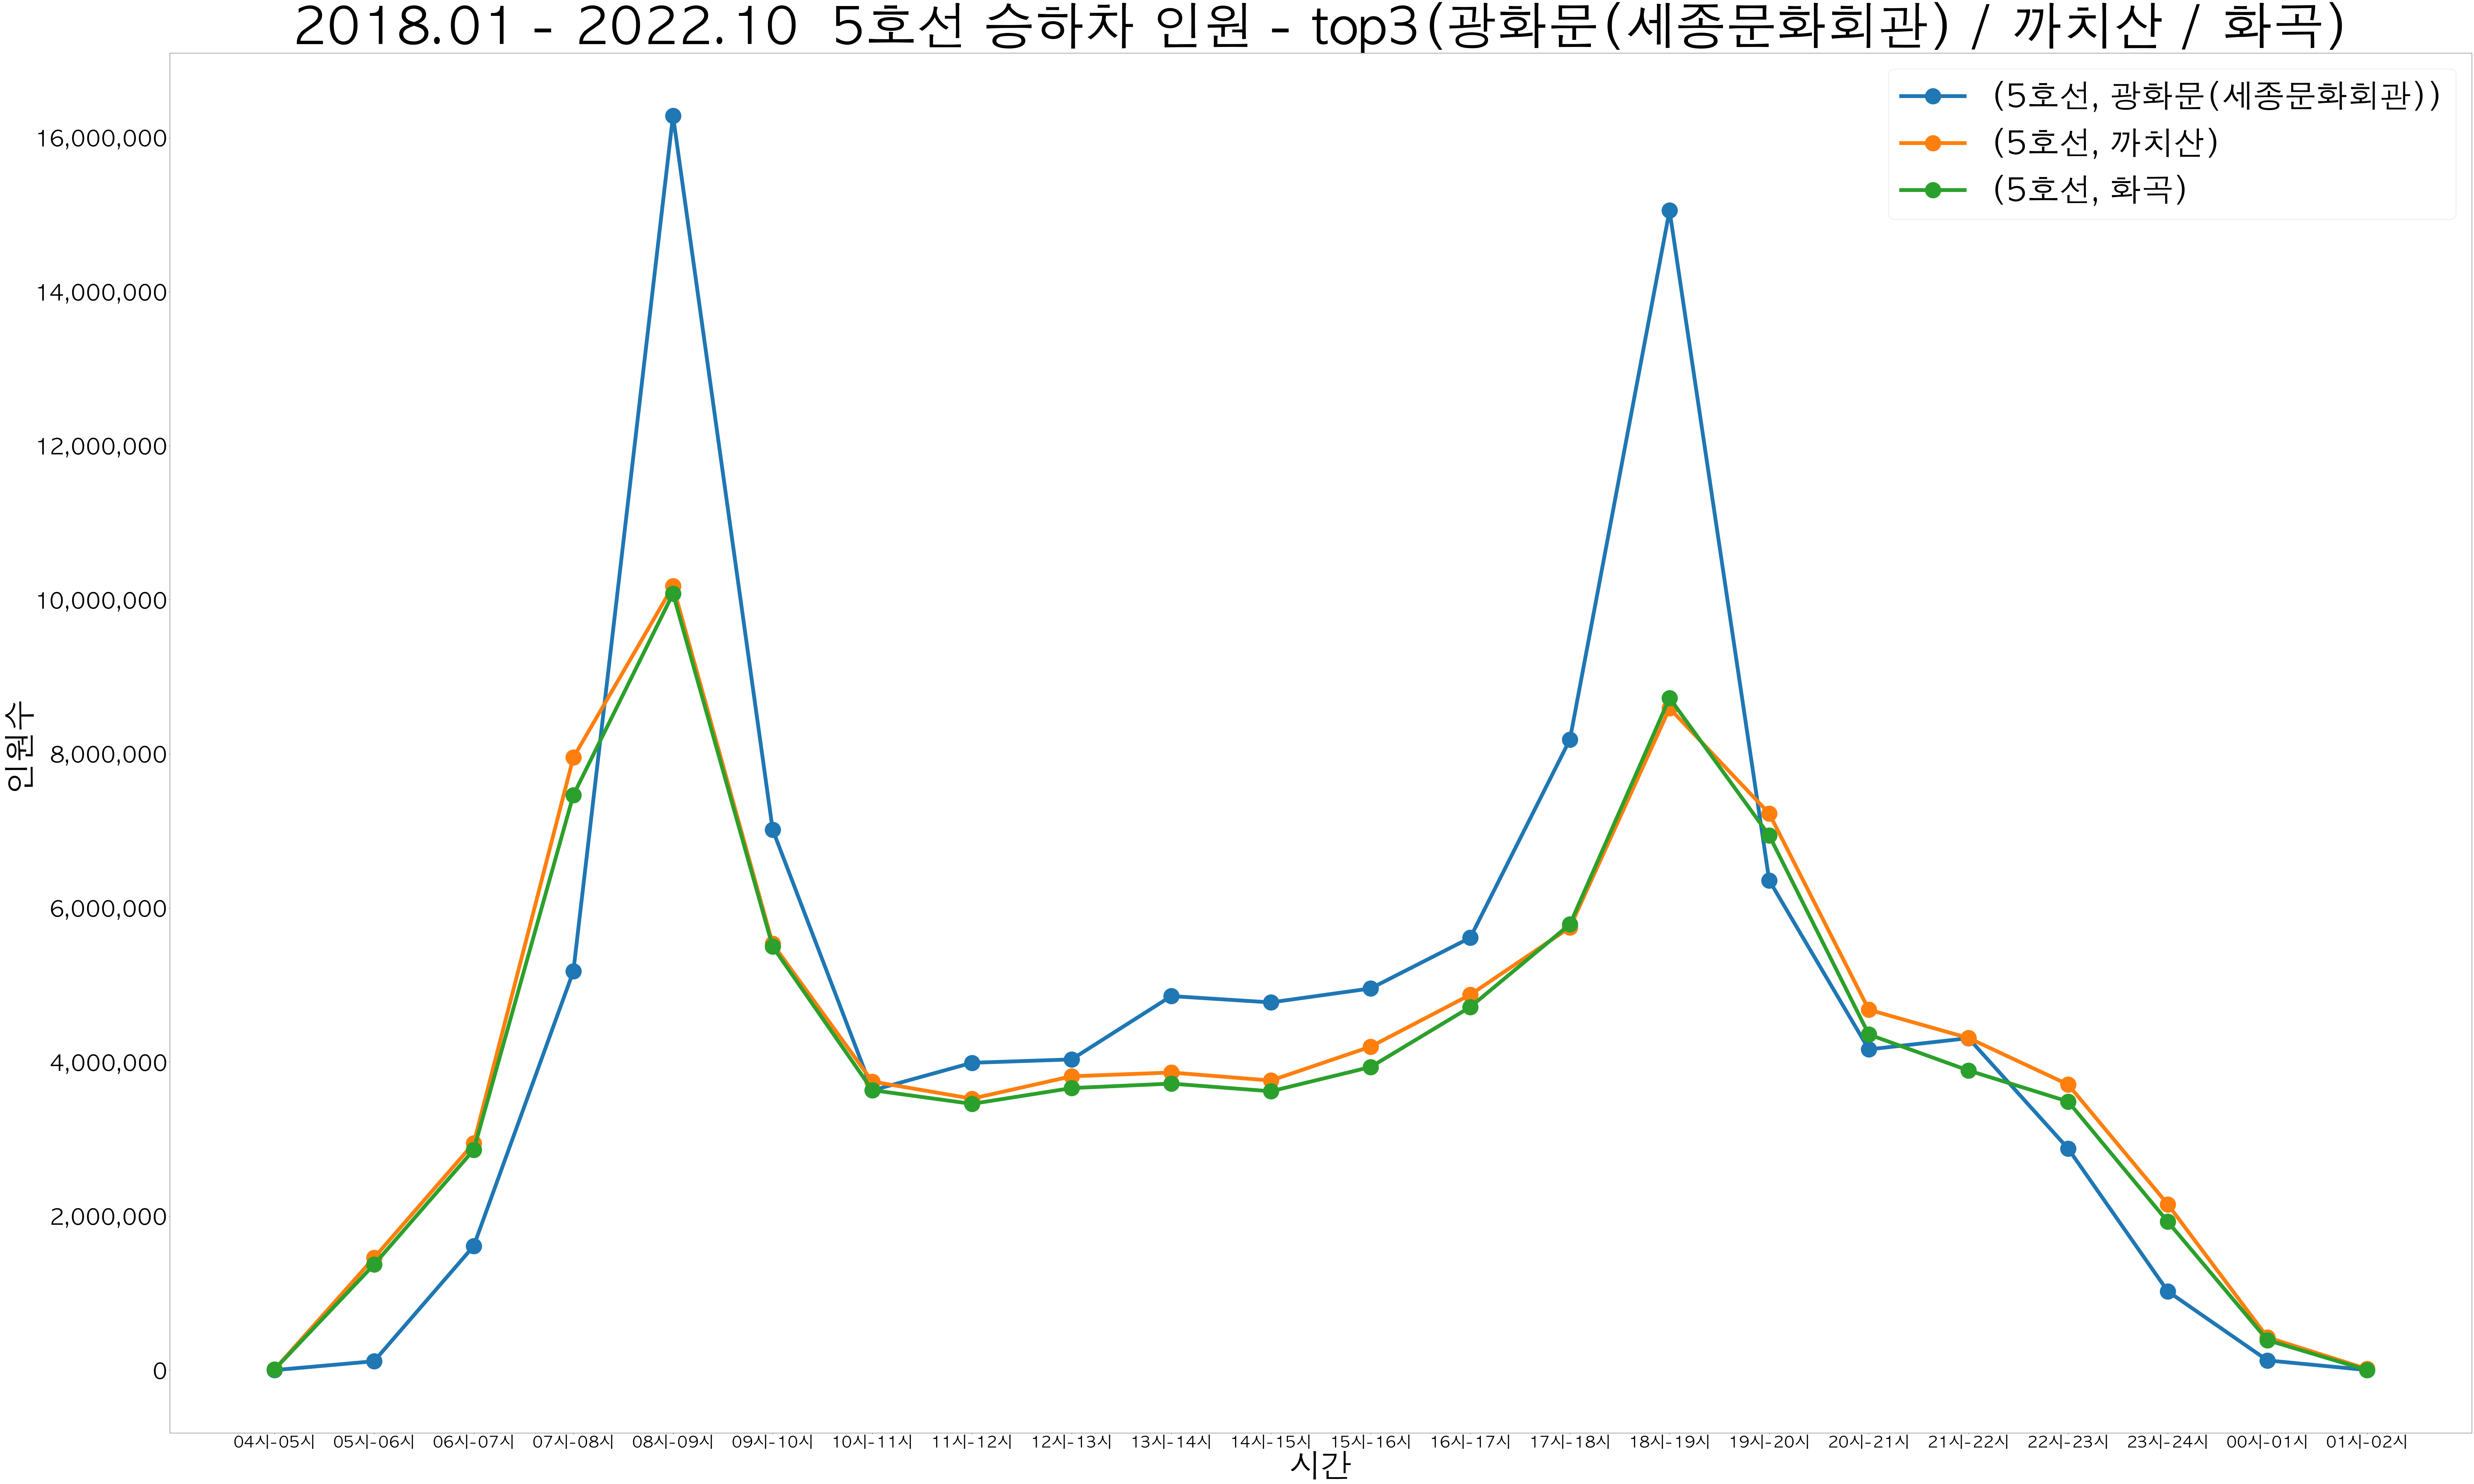

In [113]:
make_line_gr(third_df,"third_df")